<a href="https://colab.research.google.com/github/anyaagarwal5/TEXT-SUMMARIZATION/blob/main/preprocessingdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries for Loading Dataset
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the dataset
data1 = pd.read_csv('/content/drive/MyDrive/datset 1/news_summary.csv' , encoding='iso-8859-1')
data1.head(3)

,author,date,headlines,read_more,text,ctext
0,Chhavi Tyagi,"03 Aug 2017,Thursday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
1,Daisy Mowke,"03 Aug 2017,Thursday",Malaika slams user who trolled her for 'divorc...,http://www.hindustantimes.com/bollywood/malaik...,Malaika Arora slammed an Instagram user who tr...,"From her special numbers to TV?appearances, Bo..."
2,Arshiya Chopra,"03 Aug 2017,Thursday",'Virgin' now corrected to 'Unmarried' in IGIMS...,http://www.hindustantimes.com/patna/bihar-igim...,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...


In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/datset 1/news_summary_more.csv' , encoding='iso-8859-1')
data2.head(3)

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...


In [ ]:
data1.columns

Index(['author', 'date', 'headlines', 'read_more', 'text', 'ctext'], dtype='object')

In [ ]:
#Preprocessing the Master Dataset
# ctext = complete text ,  text = summarized text(target)
data=data1[['ctext','text']]
data.columns = ['text', 'summary']
data.head()

,text,summary
0,The Daman and Diu administration on Wednesday ...,The Administration of Union Territory Daman an...
1,"From her special numbers to TV?appearances, Bo...",Malaika Arora slammed an Instagram user who tr...
2,The Indira Gandhi Institute of Medical Science...,The Indira Gandhi Institute of Medical Science...
3,Lashkar-e-Taiba's Kashmir commander Abu Dujana...,Lashkar-e-Taiba's Kashmir commander Abu Dujana...
4,Hotels in Mumbai and other Indian cities are t...,Hotels in Maharashtra will train their staff t...


In [ ]:
data.describe()

,text,summary
count,4396,4514
unique,4341,4514
top,AAJ TAK LIVE TV WITH LIVE ELECTION RESULTS I c...,The Administration of Union Territory Daman an...
freq,13,1


In [ ]:
#library to perform string operations
!pip install unidecode
import string
from unidecode import unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
def process_data(input_text):

    #convert to string type

    input_text = str(input_text)

    #convert input text to lowercase

    input_text = input_text.lower()

    #Converting accented letters to unaccented letters replace error with empty string

    input_text = unidecode( input_text , errors='ignore')

    # rejoing text to include only lowercase letters and punctuation

    input_text = ''.join((char if char in (string.punctuation + string.ascii_lowercase) else ' ' for char in input_text))

    #return the final string

    return input_text

In [ ]:
data.loc[:, 'text'] = data['text'].apply(process_data)

In [ ]:
data['text'].head()

0    the daman and diu administration on wednesday ...
1    from her special numbers to tv?appearances, bo...
2    the indira gandhi institute of medical science...
3    lashkar-e-taiba's kashmir commander abu dujana...
4    hotels in mumbai and other indian cities are t...
Name: text, dtype: object

In [ ]:
data.loc[:, 'summary'] = data['summary'].apply(process_data)

In [ ]:
data['summary'].head()

0    the administration of union territory daman an...
1    malaika arora slammed an instagram user who tr...
2    the indira gandhi institute of medical science...
3    lashkar-e-taiba's kashmir commander abu dujana...
4    hotels in maharashtra will train their staff t...
Name: summary, dtype: object

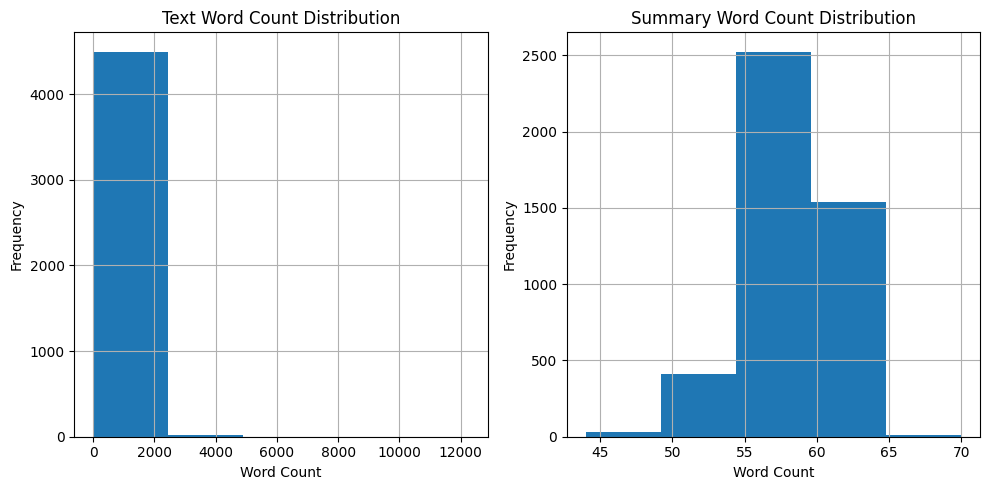

In [ ]:
import matplotlib.pyplot as plt
#histogram to visualize and compare the sentence length distributions between the original text
# and its summary

text_count = []

summary_count = []

for sentence in data['text']:
    text_count.append(len(sentence.split()))

for sentence in data['summary']:

    summary_count.append(len(sentence.split()))
    graph= pd.DataFrame()

graph['text']=text_count

graph['summary']=summary_count

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot histograms
graph['text'].hist(bins=5, ax=ax1)

graph['summary'].hist(bins=5, ax=ax2)

# Add labels and titles
ax1.set_title('Text Word Count Distribution')

ax1.set_xlabel('Word Count')

ax1.set_ylabel('Frequency')

ax2.set_title('Summary Word Count Distribution')

ax2.set_xlabel('Word Count')

ax2.set_ylabel('Frequency')

# Show plot
plt.tight_layout()

plt.show()

In [ ]:
#Saving the dataset

data.to_csv('preprocessed.csv' , index=False)